## Problem:
- csv extracted off the "csv_n_dataset_per_image" is not consistent from machine to machine

## Target:
- extract csv

## Method:
- having an anchor point (location at local 0,0) for every image, then calculate every points relative to the anchor

In [17]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [62]:
root = '/home/user/Dev/Git/roofcounting/'
image_name = "Image_1a"
image_ext = ".csv"
# image_ext = ".jpg"
image_file = os.path.join("data/csv/", (image_name + image_ext))
image_path = os.path.join(root, image_file)
# image = cv2.imread(image_path)
# print(image_path)
csv_raw = pd.read_csv(image_path)

In [63]:
print(csv_raw.dtypes)
csv_raw.head()

FID           int64
OBJECTID      int64
X_Point     float64
Y_Point     float64
X_Anchor    float64
Y_Anchor    float64
dtype: object


,FID,OBJECTID,X_Point,Y_Point,X_Anchor,Y_Anchor
0,1,4355,724027.4107,9298446.964,723557.0545,9299180.191
1,2,4356,724027.4107,9298446.964,723557.0545,9299180.191
2,3,4359,723629.2140,9298448.808,723557.0545,9299180.191
3,4,4360,723629.2140,9298448.808,723557.0545,9299180.191
4,5,4409,723582.9502,9298455.688,723557.0545,9299180.191


In [64]:
csv_raw["x"] = csv_raw['X_Point'] - csv_raw['X_Anchor']
csv_raw["y_raw"] = csv_raw["Y_Point"] - csv_raw["Y_Anchor"]

In [65]:
csv_raw.head()

,FID,OBJECTID,X_Point,Y_Point,X_Anchor,Y_Anchor,x,y_raw
0,1,4355,724027.4107,9298446.964,723557.0545,9299180.191,470.3562,-733.227
1,2,4356,724027.4107,9298446.964,723557.0545,9299180.191,470.3562,-733.227
2,3,4359,723629.2140,9298448.808,723557.0545,9299180.191,72.1595,-731.383
3,4,4360,723629.2140,9298448.808,723557.0545,9299180.191,72.1595,-731.383
4,5,4409,723582.9502,9298455.688,723557.0545,9299180.191,25.8957,-724.503


In [66]:
# csv_raw["FID"].value_counts()
print(csv_raw[csv_raw['y_raw'] > 1]['FID'].nunique())
print(csv_raw['FID'].count())


14
2884


In [67]:
csv = csv_raw[csv_raw['y_raw'] < 1][['x','y_raw']]

In [69]:
csv['y'] = abs(csv['y_raw'])

In [73]:
csv.drop(['y_raw'], axis=1, inplace=True)

In [95]:
csv.reset_index(inplace=True)

In [96]:
print(csv.count())
# print(csv.loc[2867])
csv.tail()

index    2870
x        2870
y        2870
dtype: int64
index    2867.0000
x         160.9255
y           0.1320
Name: 2867, dtype: float64


,index,x,y
2865,2865,299.1470,1.500
2866,2866,160.9255,0.132
2867,2867,160.9255,0.132
2868,2870,391.0843,0.695
2869,2871,391.0843,0.695


In [82]:
# check if all x and y corresponds to the points
image_name = "Image_1_pts"
image_ext = ".png"
# image_ext = ".jpg"
image_file = os.path.join("data/csv/", (image_name + image_ext))
image_path = os.path.join(root, image_file)
image = cv2.imread(image_path)

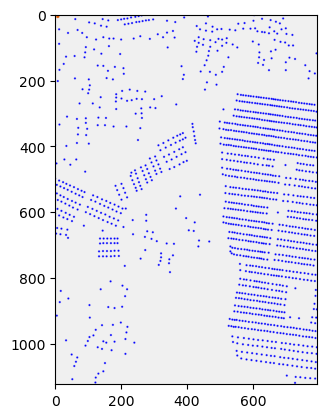

In [83]:
plt.imshow(image)

In [98]:
output = image.copy()

for i in range(len(csv)):
#     print("i: {}, X: {}, Y:{}".format(i, int(csv.loc[i, 'x']), int(csv.loc[i, 'y'])))
    cv2.circle(output, (int(csv.loc[i, 'x']), int(csv.loc[i, 'y'])), 1, (0, 255,0), 4)


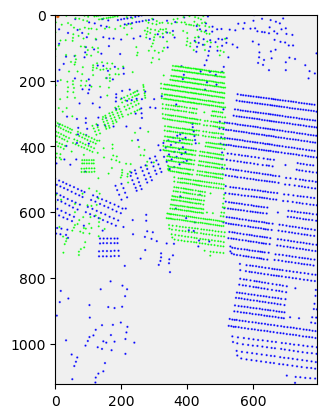

In [99]:
plt.imshow(output)